In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[ 82.5   72.5   81.5 ]
   [ 79.75  69.75  78.75]
   [ 79.    69.    78.  ]
   ...
   [ 67.5   75.5   52.5 ]
   [ 72.75  81.75  60.75]
   [ 76.    88.    66.  ]]

  [[ 78.25  68.25  77.25]
   [ 78.75  68.75  77.75]
   [ 81.5   71.5   80.5 ]
   ...
   [ 78.    88.    64.  ]
   [ 82.75  91.75  70.75]
   [ 83.25  95.25  73.25]]

  [[ 78.75  68.75  77.75]
   [ 84.5   74.5   83.5 ]
   [ 84.75  74.75  83.75]
   ...
   [ 81.    93.    69.  ]
   [ 83.    92.    71.  ]
   [ 84.5   93.5   72.5 ]]

  ...

  [[155.25 149.25 151.25]
   [155.   149.   151.  ]
   [155.25 148.75 153.25]
   ...
   [107.75 121.   100.75]
   [101.75 108.5   90.5 ]
   [ 81.75  83.75  67.25]]

  [[155.25 150.75 142.25]
   [162.75 158.25 150.75]
   [159.25 154.25 150.25]
   ...
   [ 86.75  97.75  78.25]
   [ 89.    92.    75.25]
   [102.5  100.    85.  ]]

  [[130.5  127.5  111.5 ]
   [137.   133.5  120.  ]
   [139.25 135.25 125.25]
   ...
   [ 99.75 110.75  91.25]
   [109.25 109.75  93.75]
   [113.   106.5   9

Model

To avoid Overshooting
1.Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of underfitting,so increase no of neuron
3.Add more convolution layer to extract more feature from images there may be possibility that model unable to capture revelant feature or model is confusing due to lack of feature so feed with more feature

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [ ]:
model = Sequential()

Build Convolution Layer

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))#to boost training speed not adding padding
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Dropout(0.25))#to avoid overfitting

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.45))#to avoid overfitting

In [ ]:
model.add((Dense(units=38,activation='softmax')))#neuron will give the probability of each class-softmax}Output Layer

Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()# to see all the parameters of the models

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

Model Training

In [ ]:
training_h=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 2134s 971ms/step - loss: 1.3708 - accuracy: 0.5965 - val_loss: 0.5538 - val_accuracy: 0.8280
Epoch 2/10
2197/2197 [==============================] - 2099s 955ms/step - loss: 0.4435 - accuracy: 0.8593 - val_loss: 0.3439 - val_accuracy: 0.8904
Epoch 3/10
2197/2197 [==============================] - 3773s 2s/step - loss: 0.2689 - accuracy: 0.9135 - val_loss: 0.2066 - val_accuracy: 0.9310
Epoch 4/10
2197/2197 [==============================] - 2928s 1s/step - loss: 0.1807 - accuracy: 0.9406 - val_loss: 0.2090 - val_accuracy: 0.9335
Epoch 5/10
2197/2197 [==============================] - 2208s 1s/step - loss: 0.1341 - accuracy: 0.9560 - val_loss: 0.2174 - val_accuracy: 0.9299
Epoch 6/10
2197/2197 [==============================] - 1665s 758ms/step - loss: 0.1073 - accuracy: 0.9644 - val_loss: 0.1768 - val_accuracy: 0.9437
Epoch 7/10
2197/2197 [==============================] - 2473s 1s/step - loss: 0.0890 - accuracy: 0.9710 - val_los

##Model Evaluation

In [ ]:
#Model Evaluation on Training Set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 463s 211ms/step - loss: 0.0230 - accuracy: 0.9931


In [ ]:
print(train_loss,train_acc)

0.023037342354655266 0.9931005239486694


In [ ]:
#Model Evaluation on Validation Set
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 112s 203ms/step - loss: 0.1017 - accuracy: 0.9715


In [ ]:
print(val_loss,val_acc)

0.10170788317918777 0.9714887142181396


##Saving Model

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_h.history

{'loss': [1.3708343505859375,
  0.4435146749019623,
  0.268887996673584,
  0.18072059750556946,
  0.1340552270412445,
  0.10732319205999374,
  0.08902649581432343,
  0.07183221727609634,
  0.06437379866838455,
  0.05600929260253906],
 'accuracy': [0.5964720249176025,
  0.8592645525932312,
  0.9134789109230042,
  0.9405505657196045,
  0.9560139179229736,
  0.9644355773925781,
  0.9709794521331787,
  0.9776086211204529,
  0.9795433282852173,
  0.9816629886627197],
 'val_loss': [0.553799033164978,
  0.343863844871521,
  0.20662294328212738,
  0.20901665091514587,
  0.21744616329669952,
  0.17679911851882935,
  0.11263993382453918,
  0.11630243808031082,
  0.1350870579481125,
  0.10170791298151016],
 'val_accuracy': [0.8279649615287781,
  0.8903937935829163,
  0.9309697151184082,
  0.9334737062454224,
  0.9299453496932983,
  0.9436603784561157,
  0.9644320607185364,
  0.9623833298683167,
  0.9614158868789673,
  0.9714887142181396]}

In [ ]:
#Recording History
import json 
with open("training_history.json","w") as f:
    json.dump(training_h.history,f)

In [ ]:
#Visualization

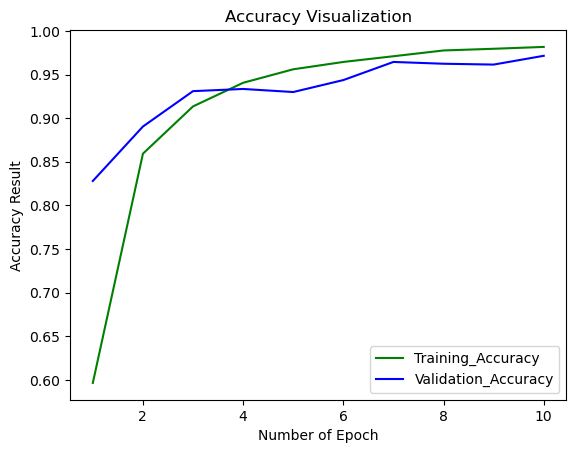

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_h.history['accuracy'],color='green',label='Training_Accuracy')
plt.plot(epochs,training_h.history['val_accuracy'],color='blue',label='Validation_Accuracy')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy Result')
plt.title('Accuracy Visualization')
plt.legend()
plt.show()

##Metrics for matrix evaluation

In [ ]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred=model.predict(test_set)
y_pred

550/550 [==============================] - 101s 184ms/step


array([[1.0000000e+00, 2.3906141e-10, 3.4440439e-12, ..., 2.3743114e-16,
        6.9840821e-16, 6.3320165e-16],
       [9.9995983e-01, 4.4160865e-06, 1.9104328e-10, ..., 3.2063829e-12,
        3.7497071e-12, 4.6837985e-11],
       [1.0000000e+00, 1.6369397e-15, 1.9337655e-16, ..., 2.1506985e-23,
        2.7576687e-22, 3.5052368e-21],
       ...,
       [4.3030218e-10, 2.0285282e-11, 6.6024448e-08, ..., 4.5426524e-10,
        1.5294339e-10, 9.9999487e-01],
       [1.5473061e-12, 1.2716843e-13, 1.4567612e-10, ..., 1.1889506e-11,
        2.2898529e-11, 1.0000000e+00],
       [2.8527695e-15, 2.5574389e-16, 4.2632155e-15, ..., 1.4521242e-16,
        3.3888609e-14, 1.0000000e+00]], dtype=float32)

In [ ]:
y_pred.shape

(17572, 38)

In [ ]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
true_categories=tf.concat([y for x,y in test_set],axis=0)

In [ ]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [ ]:
cm=confusion_matrix(y_true,predicted_categories)
cm.shape

(38, 38)

Confusion Matrix Validation

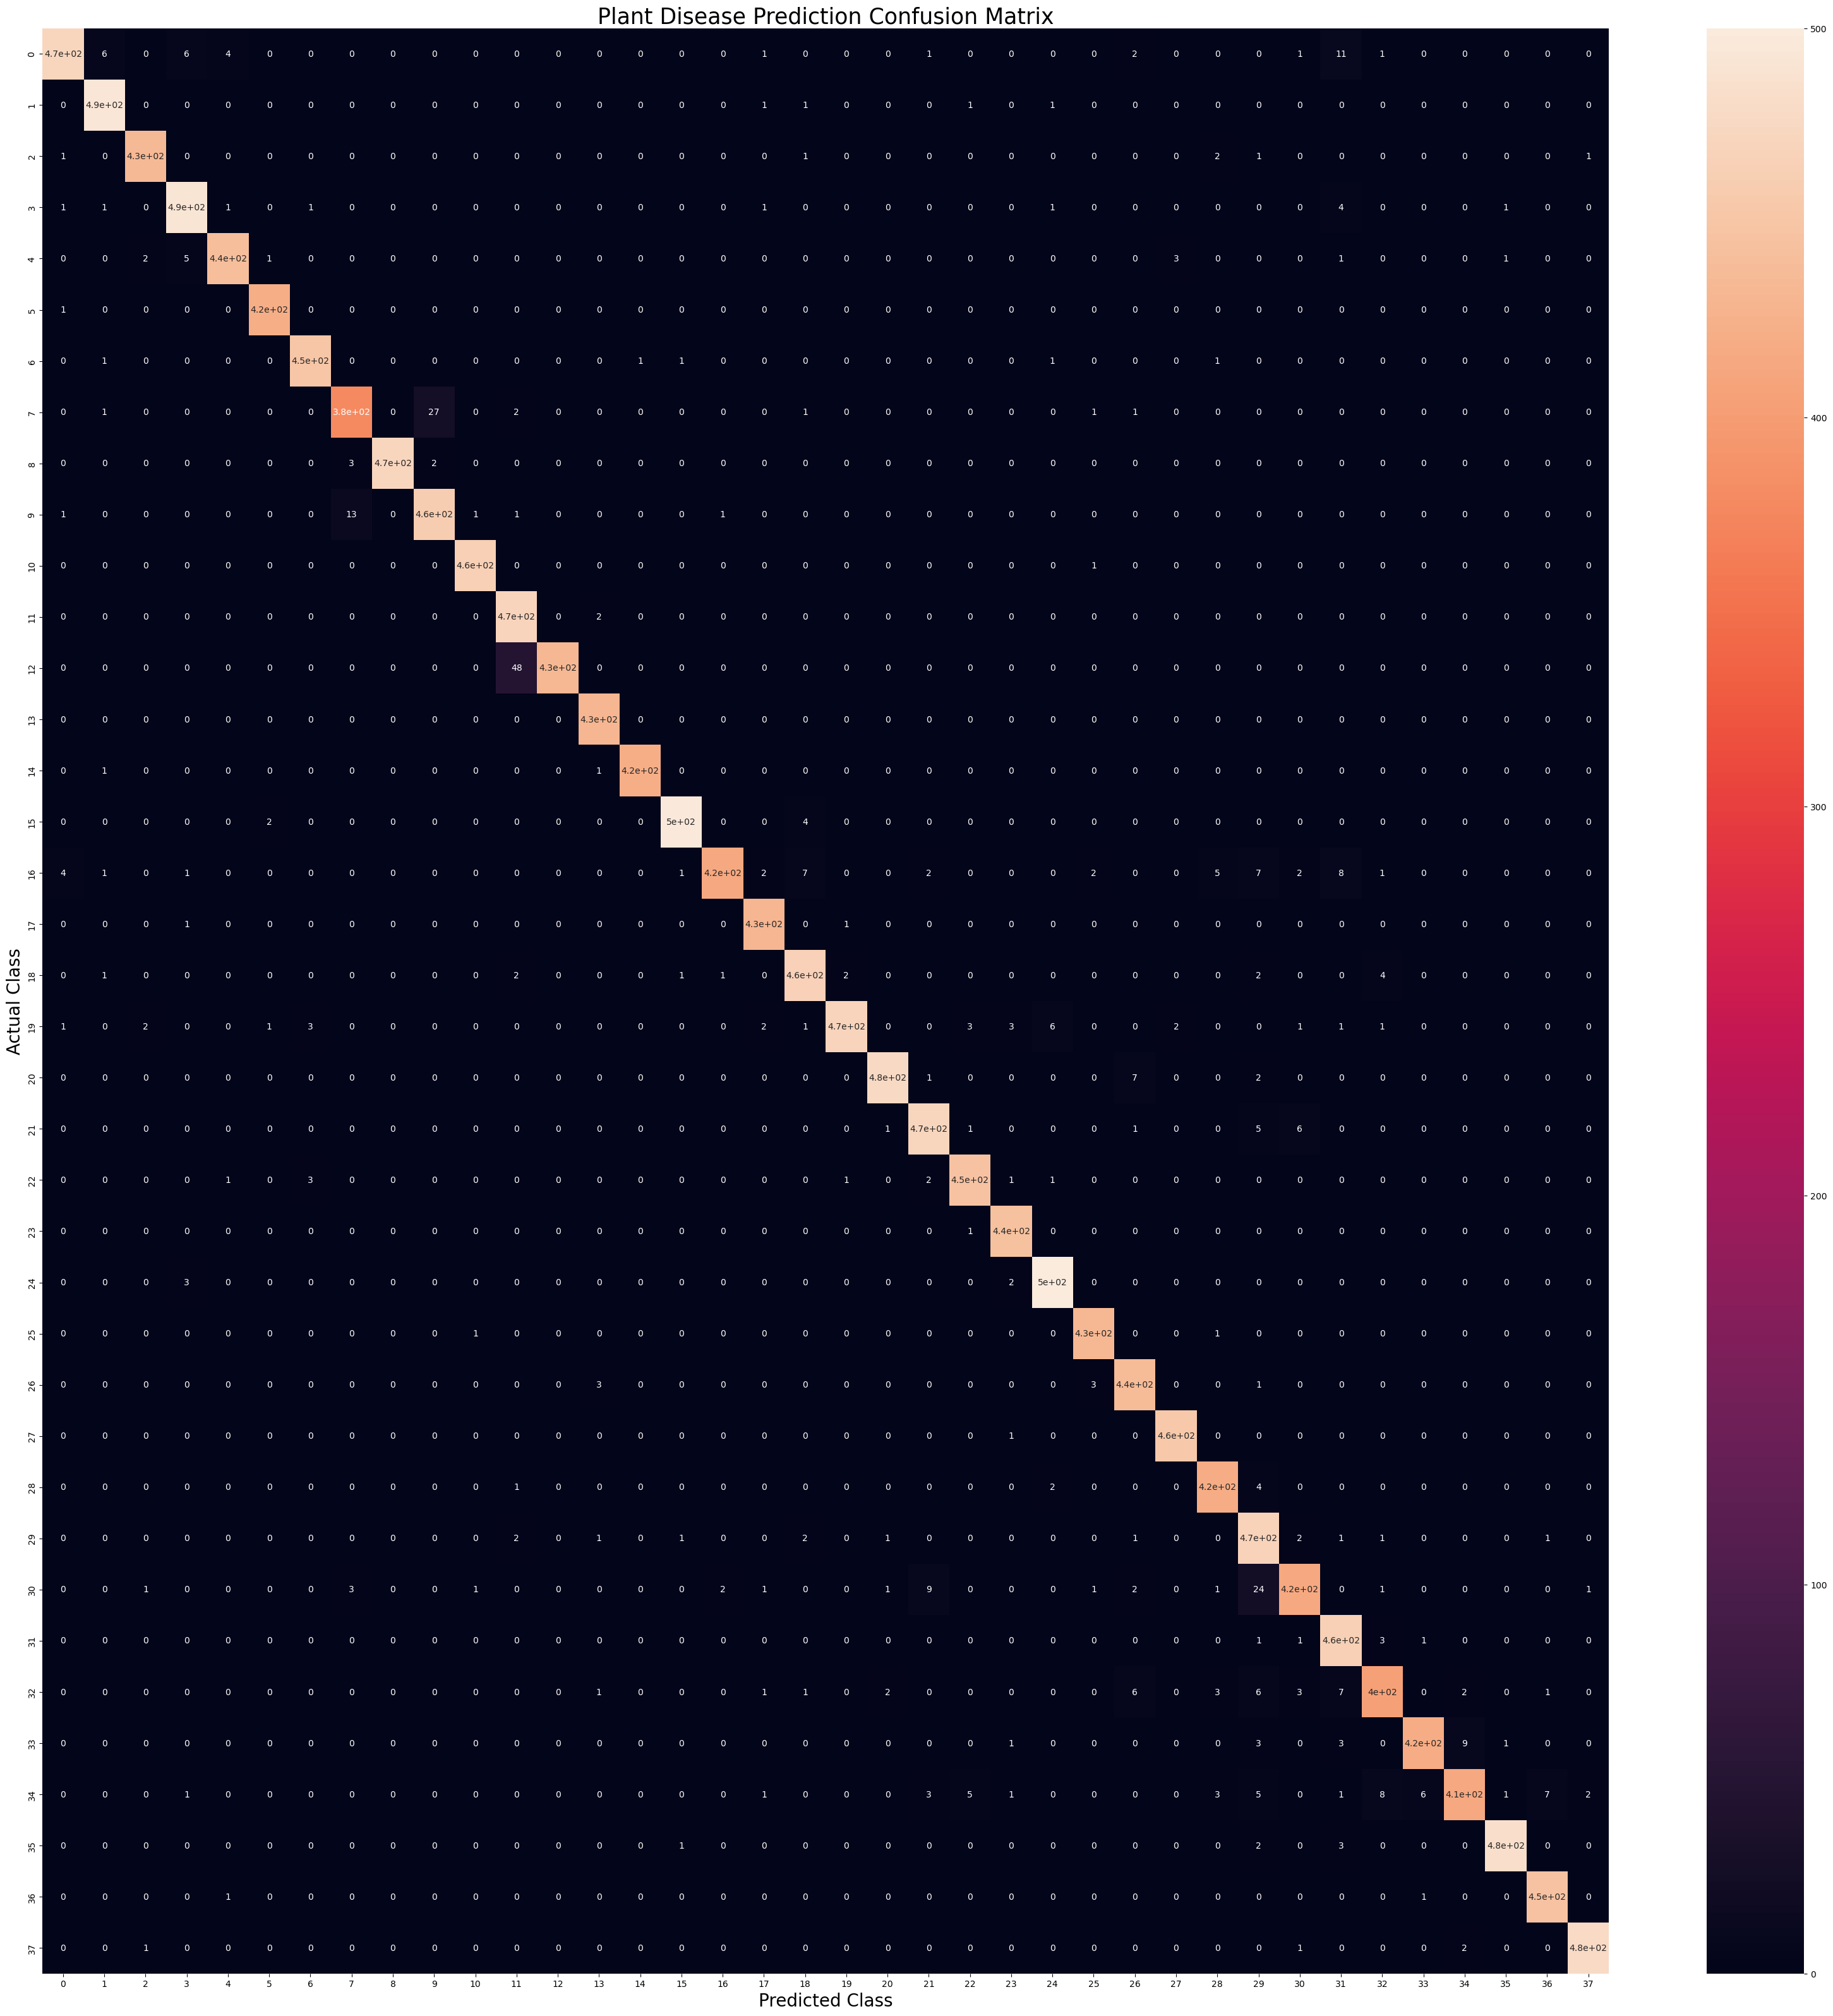

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()